In [11]:
import pandas as pd
import numpy as np

# Load the Dataset

In [2]:
data=pd.read_csv(r"C:\Users\disha\Downloads\Basic stats - 1\Basic stats - 1\sales_data_with_discounts.csv")
data.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [12]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols= data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)


Categorical Variables:
Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')
Numerical Variables:
['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']


# Calculate Basic Statistical Measures

In [3]:
numerical_columns = ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']

statistics = data[numerical_columns].agg(['mean', 'median', 'std', lambda x: x.mode()[0]])
statistics.index = ['Mean', 'Median', 'Standard Deviation', 'Mode']
print(statistics)

                      Volume     Avg Price  Total Sales Value  \
Mean                5.066667  10453.433333       33812.835556   
Median              4.000000   1450.000000        5700.000000   
Standard Deviation  4.231602  18079.904840       50535.074173   
Mode                3.000000    400.000000       24300.000000   

                    Discount Rate (%)  Discount Amount  Net Sales Value  
Mean                        15.155242      3346.499424     30466.336131  
Median                      16.577766       988.933733      4677.788059  
Standard Deviation           4.220602      4509.902963     46358.656624  
Mode                         5.007822        69.177942       326.974801  


# Data Visualization

# Histograms

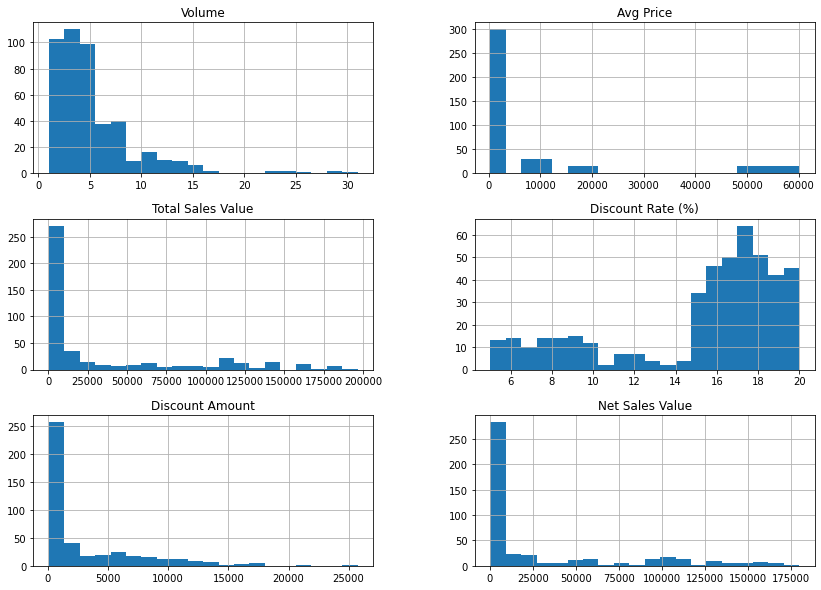

In [4]:
import matplotlib.pyplot as plt
data[numerical_columns].hist(bins=20, figsize=(14, 10))
plt.show()


# Boxplots

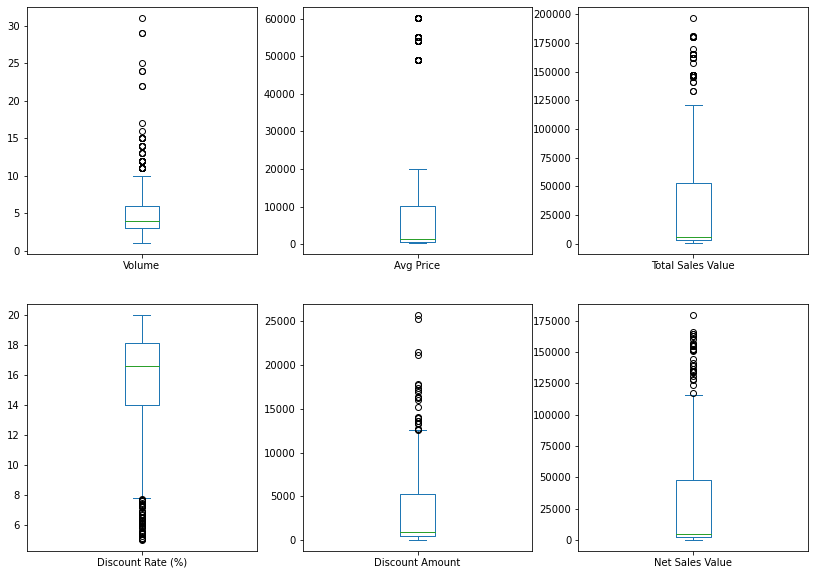

In [5]:
data[numerical_columns].plot(kind='box', subplots=True, layout=(2, 3), figsize=(14, 10))
plt.show()


# Bar Chart Analysis for Categorical Column

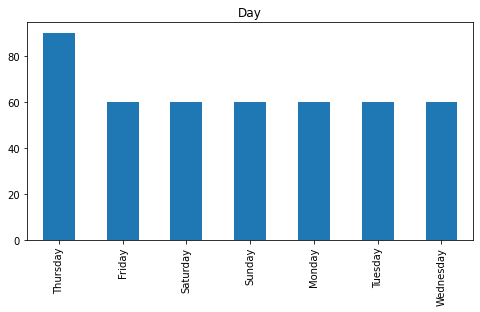

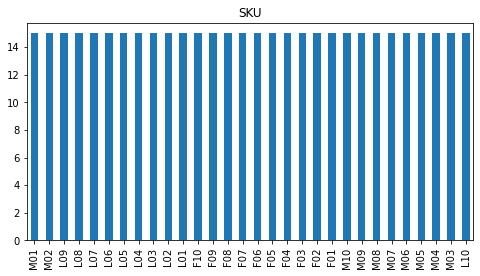

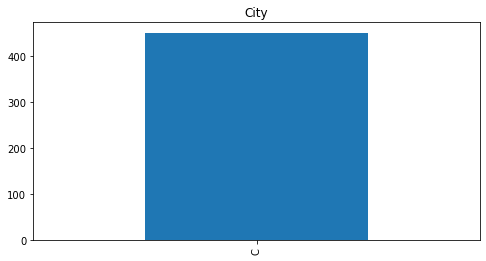

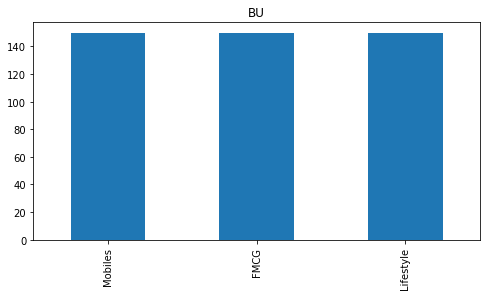

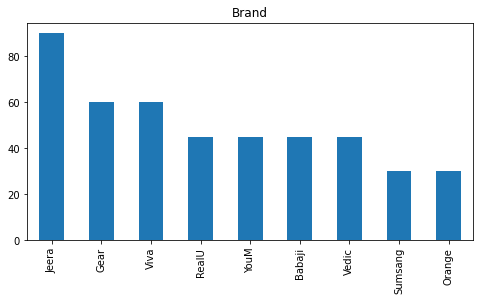

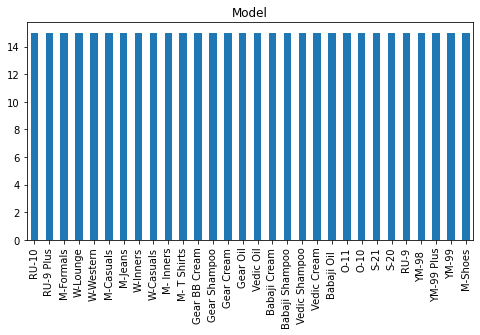

In [6]:
categorical_columns = ['Day', 'SKU', 'City', 'BU', 'Brand', 'Model']

for column in categorical_columns:
    data[column].value_counts().plot(kind='bar', title=column, figsize=(8, 4))
    plt.show()


# Standardization of Numerical Variables

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_data = pd.DataFrame(scaler.fit_transform(data[numerical_columns]), columns=numerical_columns)
print(data[numerical_columns].head())
print(standardized_data.head())


   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  
0    160346.501180  
1     89323.897039  
2    102042.089843  
3    112235.925298  
4     19927.053770  
     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.350029   0.091173           2.925721          -0.830289         3.952816   
1  1.167129  -0.019570           1.330995          -0.852661         1.849014   
2  0.457388   0.312659           1.562775          -1.351631         1.622995   
3  0.220808   0.534146           1.719276          -1.949723         1.1138

# Conversion of Categorical Data into Dummy Variables

In [8]:
encoded_data = pd.get_dummies(data, columns=categorical_columns)

print(encoded_data.head())

         Date  Volume  Avg Price  Total Sales Value  Discount Rate (%)  \
0  01-04-2021      15      12100             181500          11.654820   
1  01-04-2021      10      10100             101000          11.560498   
2  01-04-2021       7      16100             112700           9.456886   
3  01-04-2021       6      20100             120600           6.935385   
4  01-04-2021       3       8100              24300          17.995663   

   Discount Amount  Net Sales Value  Day_Friday  Day_Monday  Day_Saturday  \
0     21153.498820    160346.501180           0           0             0   
1     11676.102961     89323.897039           0           0             0   
2     10657.910157    102042.089843           0           0             0   
3      8364.074702    112235.925298           0           0             0   
4      4372.946230     19927.053770           0           0             0   

   ...  Model_Vedic Cream  Model_Vedic Oil  Model_Vedic Shampoo  \
0  ...                  0

# Conclusion

Basic statistics provided insights into central tendencies and variability in the dataset.

Histograms and boxplots revealed the distribution and outliers, while bar charts showed category frequencies.

Standardization: Ensured uniformity in numerical data, improving its suitability for analysis.

One-Hot Encoding: Transformed categorical variables into a machine-learning-friendly format, facilitating model training.